# <center>THE BIG BANG THEORY</center>


<div style="display: flex; align-items: center;">
    <img src="https://upload.wikimedia.org/wikipedia/en/thumb/7/7b/The_Big_Bang_Theory_%28Official_Title_Card%29.png/330px-The_Big_Bang_Theory_%28Official_Title_Card%29.png" alt="The Big Bang Theory" style="width: 200px;"/>
    <p style="margin-left: 20px;">
        <strong><em>"The Big Bang Theory"</em></strong> is a popular American television sitcom created by Chuck Lorre and Bill Prady. It originally aired on CBS from <strong><em>September 24, 2007,</em></strong> to <strong><em>May 16, 2019,</em></strong> spanning a total of twelve seasons. The show is known for its witty humor, clever writing, and endearing characters, particularly the group of socially awkward but brilliant physicists at Caltech University.
    </p>
</div>





## Extracting Data Frame by using Web Scraping

Here we performed **web scraping methods** on _"The Big Bang Theory"_ Wikipedia page to extract some statistics and organize them into a DataFrame for further analysis.

In [48]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/The_Big_Bang_Theory'

# Fetch the HTML content of the Wikipedia page
response = requests.get(url)
if response.status_code == 200:
    html_content = response.text
else:
    print("Failed to retrieve page")

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table containing viewership statistics
table = soup.find('table', {'class': 'wikitable plainrowheaders'})

# Extract data from the table
data = []
for row in table.find_all('tr'):
    columns = row.find_all(['th', 'td'])
    if len(columns) == 8:  # Ensure it's a data row
        season = columns[0].text.strip()
        episodes = columns[1].text.strip()
        # Extract year from First aired and format them as 'YYYY'
        year = re.search(r'\d{4}', columns[2].text.strip()).group()
        # Remove brackets and their contents from viewers rank and 18-49 rank
        viewers_rank = re.sub(r'\[.*?\]', '', columns[4].text.strip())
        viewers_million = re.sub(r'\[.*?\]', '', columns[5].text.strip())
        _18_49_rank = re.sub(r'\[.*?\]', '', columns[6].text.strip())
        data.append((season, episodes, year, viewers_rank, viewers_million, _18_49_rank))

# Create DataFrame from the extracted data
df = pd.DataFrame(data, columns=['Season', 'Episodes', 'Year', 'Viewers rank', 'U.S. Viewers (millions)', '18–49 rank'])

# Print DataFrame
print(df)


   Season Episodes  Year Viewers rank U.S. Viewers (millions) 18–49 rank
0       1       17  2007           68                    8.34         46
1       2       23  2008           40                   10.07          —
2       3       23  2009           12                   14.22          5
3       4       24  2010           13                   13.21          7
4       5       24  2011            8                   15.82          6
5       6       24  2012            3                   18.68          2
6       7       24  2013            2                   19.96          2
7       8       24  2014            2                   19.05          4
8       9       24  2015            2                   20.36          3
9      10       24  2016            2                   18.99          3
10     11       24  2017            1                   18.63          5
11     12       24  2018            2                   17.31          6


## Data Pre-processing
This section of the project focuses on converting the data type for statistical analyses. 
'Viewers rank', 'U.S. Viewers (millions)', and '18–49 rank' columns in the DataFrame to numeric data types. This is necessary for further analysis and visualization of viewership data.


In [49]:

# Convert numeric columns to numeric data types
df['Viewers rank'] = pd.to_numeric(df['Viewers rank'], errors='coerce')
df['U.S. Viewers (millions)'] = pd.to_numeric(df['U.S. Viewers (millions)'], errors='coerce')
df['18–49 rank'] = pd.to_numeric(df['18–49 rank'], errors='coerce')

# Print DataFrame info to check data types
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   12 non-null     object 
 1   Episodes                 12 non-null     object 
 2   Year                     12 non-null     object 
 3   Viewers rank             12 non-null     int64  
 4   U.S. Viewers (millions)  12 non-null     float64
 5   18–49 rank               11 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 708.0+ bytes
None


## Data Visualization

### 1. Exploring Peak Seasons and Trends in U.S. Viewership for The Big Bang Theory

We first explored peak seasons and trends in U.S. viewership for "The Big Bang Theory" because we wanted to understand the show's trajectory over its twelve-season history. By identifying peak seasons and analyzing viewership trends, we aimed to uncover pivotal moments of audience engagement and track how viewership evolved over time. This historical analysis helps us contextualize the show's success and provides insights into the factors influencing audience interest.

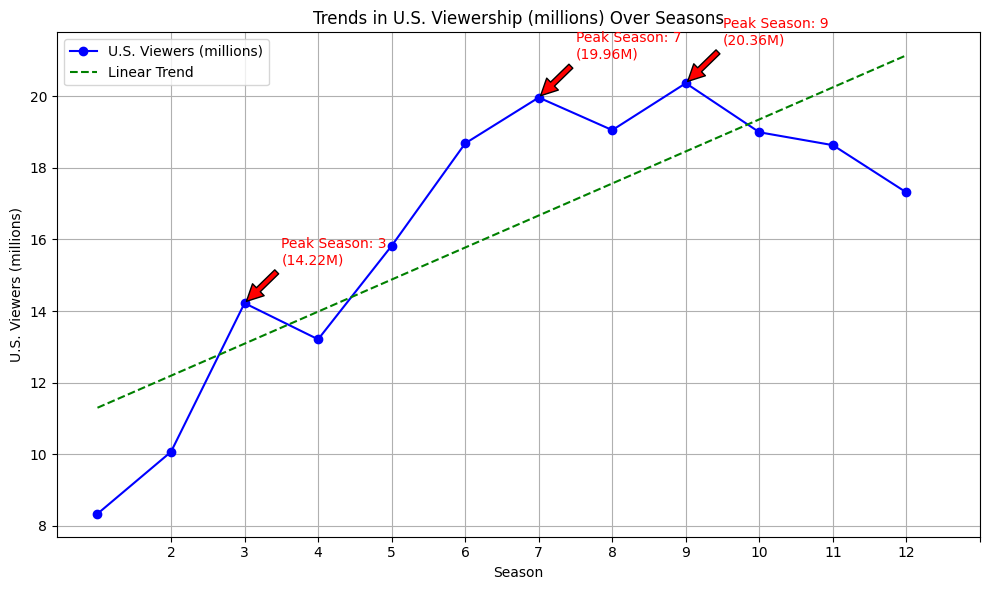

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Prepare the Data
seasons = df['Season']
viewers_millions = df['U.S. Viewers (millions)']

# Create a Line Plot
plt.figure(figsize=(10, 6))
plt.plot(seasons, viewers_millions, marker='o', color='blue', linestyle='-', label='U.S. Viewers (millions)')

# Fit linear regression
X = np.array(seasons).reshape(-1, 1)
y = viewers_millions.values.reshape(-1, 1)
reg = LinearRegression().fit(X, y)
trend_line = reg.predict(X)
plt.plot(seasons, trend_line, color='green', linestyle='--', label='Linear Trend')

# Add labels and title
plt.title('Trends in U.S. Viewership (millions) Over Seasons')
plt.xlabel('Season')
plt.ylabel('U.S. Viewers (millions)')
plt.legend()

# Show peak points
for i in range(1, len(seasons) - 1):
    if viewers_millions[i] > viewers_millions[i - 1] and viewers_millions[i] > viewers_millions[i + 1]:
        # Peak found, now check if there is a decrease in viewership in later seasons
        later_seasons = viewers_millions[i + 1:]
        if later_seasons.min() < viewers_millions[i]:
            # There is a decrease, annotate the peak
            plt.annotate(f'Peak Season: {i + 1}\n({viewers_millions[i]}M)', 
                         xy=(i, viewers_millions[i]),
                         xytext=(i + 0.5, viewers_millions[i] + 1),
                         arrowprops=dict(facecolor='red', shrink=0.05),
                         horizontalalignment='left',
                         verticalalignment='bottom', color ='red')

# Show the plot
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))
plt.tight_layout()
plt.show()


The graph shows that the U.S. viewership trends across seasons reveals a consistent upward trajectory, as depicted by the linear trend line. This indicates a progressive increase in popularity for "The Big Bang Theory" over its twelve-season span, with occasional downturns interspersed. Notably, three seasons stand out as peak periods of viewership: *Season 9 (2015) with 20.36 million viewers, Season 7 (2013) with 19.96 million viewers, and Season 8 (2014) with 19.05 million viewers*. These peaks may be attributed to significant events within the series, such as pivotal plot twists, character developments, or promotional activities. Further investigation into the correlation between these events and viewership peaks could offer insights into audience engagement dynamics. Overall, the analysis underscores the show's enduring success in captivating and retaining audiences, punctuated by distinct periods of heightened interest.

### 2. Analyzing the Ranks: A Comparative Study of Viewers Rankings and 18–49 Rankings

We delved into analyzing viewership trends in "The Big Bang Theory" through a comparative study of viewers and 18–49 rankings to gain a comprehensive understanding of its audience demographics and popularity among key demographic segments. By examining both viewership and 18–49 rankings, we aimed to discern any correlations or disparities between overall viewership and viewership within the key 18–49 demographic. This comparative analysis enables us to discern patterns in audience engagement and identify the show's relative appeal to different viewer demographics over its twelve-season run.

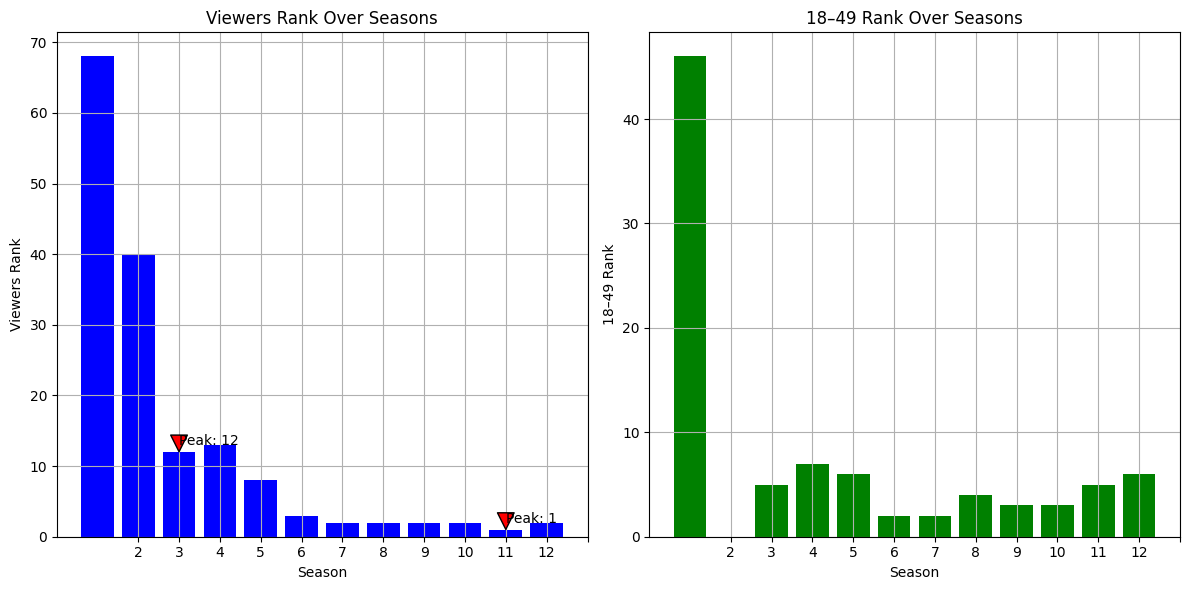

In [51]:
# Prepare the Data
seasons = df['Season']
viewers_rank = df['Viewers rank']
_18_49_rank = df['18–49 rank']

# Create Bar Plots for Viewers Rank and 18–49 Rank
plt.figure(figsize=(12, 6))

# Plot Viewers Rank
plt.subplot(1, 2, 1)
plt.bar(seasons, viewers_rank, color='blue')
plt.title('Viewers Rank Over Seasons')
plt.xlabel('Season')
plt.ylabel('Viewers Rank')
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))

# Annotate peak points for Viewers Rank
for i in range(1, len(seasons) - 1):
    if viewers_rank[i] < viewers_rank[i - 1] and viewers_rank[i] < viewers_rank[i + 1]:
        plt.annotate(f'Peak: {viewers_rank[i]}', xy=(i, viewers_rank[i]),
                     xytext=(i , viewers_rank[i] + 1), arrowprops=dict(facecolor='red', shrink=0.05))

# Plot 18–49 Rank
plt.subplot(1, 2, 2)
plt.bar(seasons, _18_49_rank, color='green')
plt.title('18–49 Rank Over Seasons')
plt.xlabel('Season')
plt.ylabel('18–49 Rank')
plt.grid(True)
plt.xticks(range(1, len(seasons) + 1))

# Annotate peak points for 18–49 Rank
for i in range(1, len(seasons) - 1):
    if _18_49_rank[i] < _18_49_rank[i - 1] and _18_49_rank[i] < _18_49_rank[i + 1]:
        plt.annotate(f'Peak: {_18_49_rank[i]}', xy=(i , _18_49_rank[i]),
                     xytext=(i , _18_49_rank[i] - 1), arrowprops=dict(facecolor='red', shrink=0.05))

plt.tight_layout()
plt.show()



The graphs illustrate the Viewers Rank and 18–49 Rank trends across the seasons of "The Big Bang Theory." Notable peaks in both indicate seasons of significant viewership achievements. While the Viewers Rank displays more variability, with fluctuations across seasons, the 18–49 Rank remains relatively stable. Both graphs exhibit an overall decreasing trend over time, suggesting a decline in rankings throughout the series. These findings emphasize the dynamic nature of viewership trends for the show, with occasional spikes indicating periods of heightened audience interest amidst a general downward trajectory in rankings over the twelve-season span.

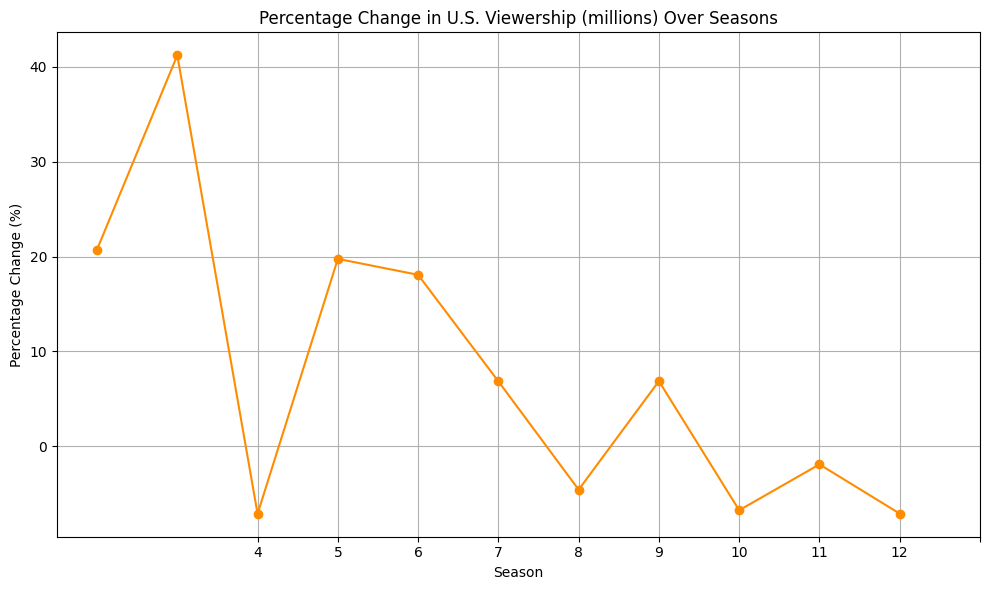

In [52]:
# Calculate percentage changes in viewership
df['Viewership Change (%)'] = df['U.S. Viewers (millions)'].pct_change() * 100

# Plot the percentage change data
plt.figure(figsize=(10, 6))
plt.plot(seasons[1:], df['Viewership Change (%)'][1:], marker='o', color='darkorange', linestyle='-')

# Add labels and title
plt.title('Percentage Change in U.S. Viewership (millions) Over Seasons')
plt.xlabel('Season')
plt.ylabel('Percentage Change (%)')

# Show the plot
plt.grid(True)
plt.xticks(range(2, len(seasons)))
plt.tight_layout()
plt.show()
